In [3]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

In [4]:
random_state("rng_states/experiment3.npy")

In [5]:
S = ([0.7] * 4 + [0.5] * 2) * 3
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

rectangles = [((1.6, 2.), (7., 3.)), ((-7., 2.), (-0.4, 3.)), ((0.1, 2.), (1.1, 3.)),
              ((-7., 4.5), (-1.3, 6.)), ((-0.8, 5.), (7., 6.5))]
rectangle_vs = [(-0.2, 0.)] * 3 + [(0.2, 0.)] * 2
targets = [(1., 8.)] * T
rectangle_lists = rectangles_with_velocity(rectangles, rectangle_vs, T)

objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangles)

n = 600
alpha_inf = 0.8
n_immigrants = 300
eta_c = 3.
eta_m = 10.
p_c = 0.9
p_m = 0.02
num_iterations_init = 200
num_iterations = 120

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 271, best: [31.18819441], #infeasible: 329, best: [4.33752615 1.        ]
Iteration 20, #feasible: 120, best: [6.4919446], #infeasible: 480, best: [4.67097127e-04 1.00000000e+00]
Iteration 40, #feasible: 120, best: [0.1818515], #infeasible: 480, best: [4.67097127e-04 1.00000000e+00]
Iteration 60, #feasible: 120, best: [0.00023334], #infeasible: 480, best: [2.08501699e-05 1.00000000e+00]
Iteration 80, #feasible: 120, best: [9.78904244e-08], #infeasible: 480, best: [6.4202785e-10 1.0000000e+00]
Iteration 100, #feasible: 120, best: [6.32864445e-08], #infeasible: 480, best: [1.3396048e-11 1.0000000e+00]
Iteration 120, #feasible: 120, best: [4.69102548e-09], #infeasible: 480, best: [8.86594358e-14 1.00000000e+00]
Iteration 140, #feasible: 120, best: [2.47707302e-09], #infeasible: 480, best: [1.57270371e-15 1.00000000e+00]
Iteration 160, #feasible: 120, best: [2.27063623e-09], #infeasible: 480, best: [6.35447924e-17 1.00000000e+00]
Iteration 180, #feasible: 120, b

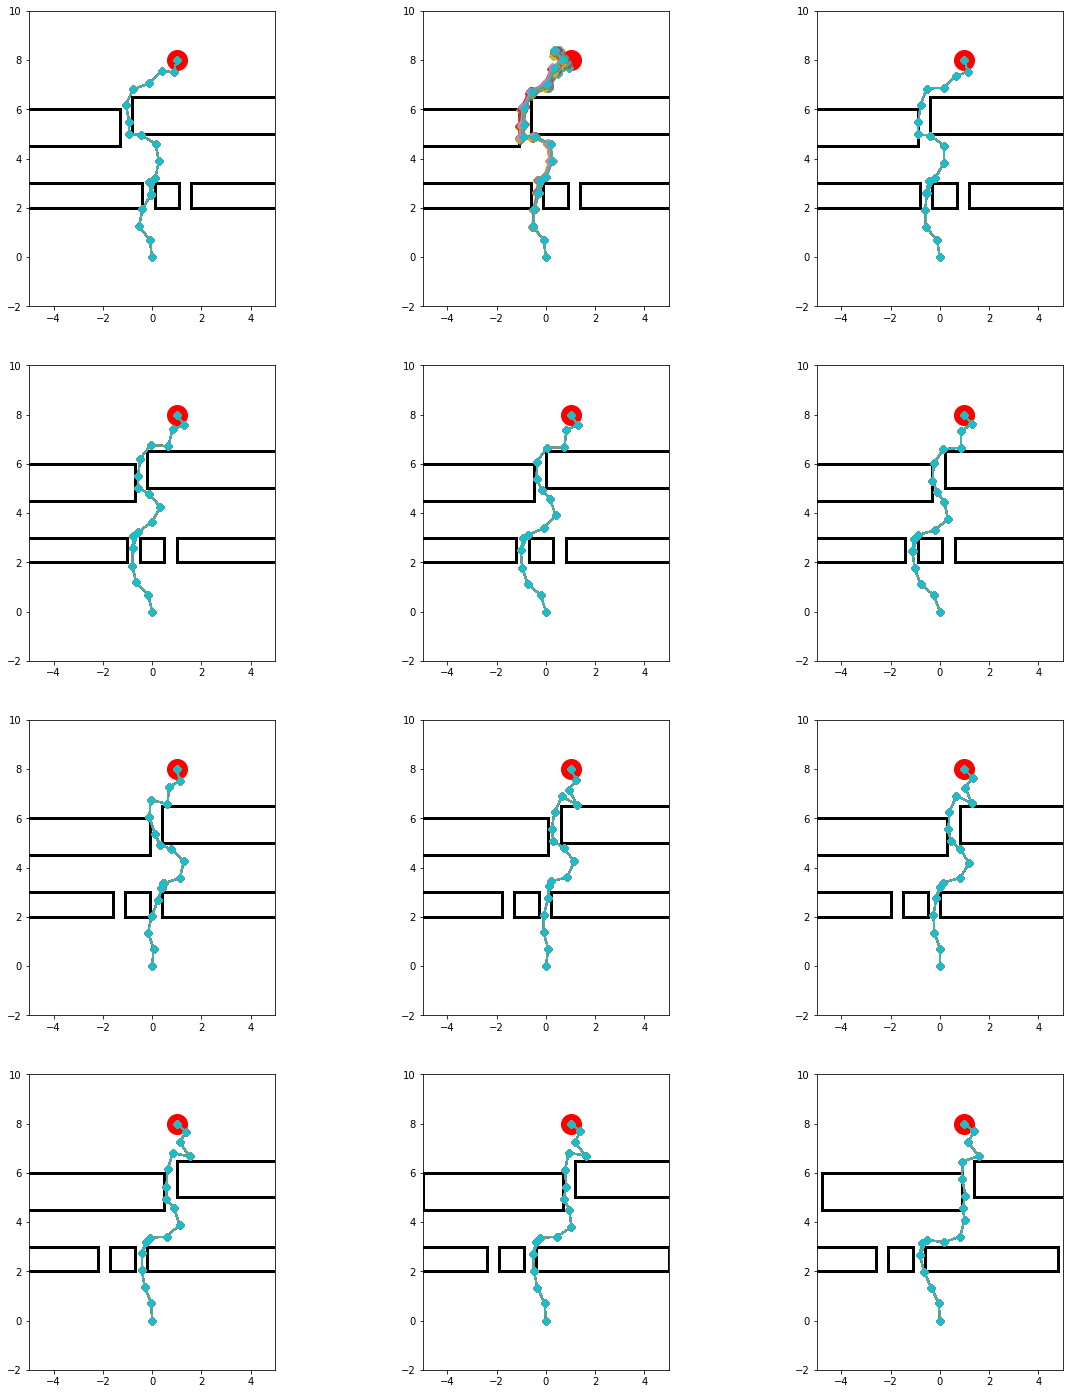

In [6]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)

draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T),
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))

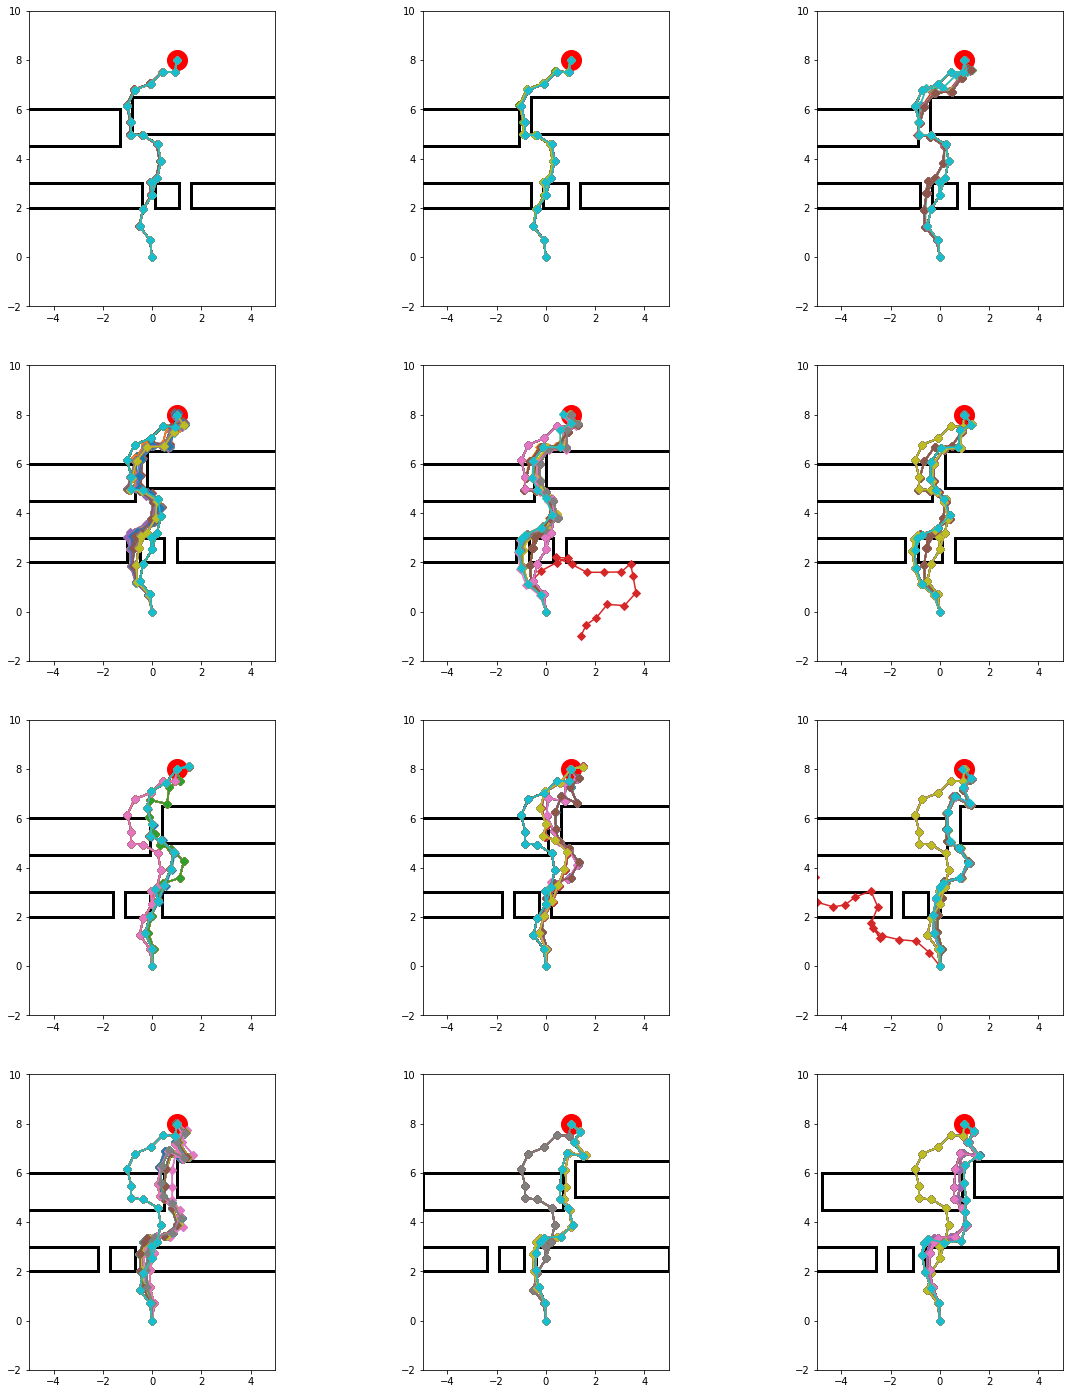

In [7]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)

draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T),
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(0-2, 10))
